In [7]:
# !pip install pycaret[full]

In [8]:
import sklearn
sklearn.__version__

'1.4.2'

In [9]:
from pycaret.utils import version
version()

'3.3.2'

In [10]:
import sklearn
sklearn.__version__

'1.4.2'

In [11]:
import pandas as pd
from pycaret.datasets import get_data
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,cross_validate
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
#设置图片大小
plt.style.use({"figure.figsize":(25,15)})
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [12]:
data_re = pd.read_csv(r"D:\lunwen\xunlian.csv")
# X=data_re.drop(["POINT_X","POINT_Y","pm_idw","Potential_evaporation","zd_result_pm"],axis=1)
X=data_re.drop(["O3"],axis=1)
y=data_re[["O3"]]
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)
X

,LG,LT,DATE,2TM,NDVI,UW,VW,BH,O33,SP,NT,RH,TP,TC,TE,PM25,VOC,NLM,MPD,DEM
0,116.9862,36.6114,1,3.632000,0.227689,0.539229,0.523644,699.559021,0.153875,100756.0,-8980800.0,18.225800,0.000000,0.264245,-0.001503,410.717987,2242.260010,20.299630,10929.400390,110.894997
1,116.9376,36.6650,1,4.523010,0.221204,0.641859,0.660945,703.940002,0.154689,101389.0,-9273960.0,17.529301,0.000000,0.256891,-0.001470,447.476990,2455.760010,20.299630,6495.160156,29.708799
2,117.1265,36.6734,1,3.731995,0.290334,0.672084,0.528891,705.215027,0.155561,100561.0,-9000820.0,18.760401,0.000000,0.255413,-0.001533,487.355988,2688.800049,20.299630,1353.310059,101.977997
3,117.0624,36.6868,1,4.121002,0.305584,0.655154,0.614816,706.242004,0.155263,101044.0,-9131710.0,18.534800,0.000000,0.252868,-0.001530,398.243988,2158.100098,20.299630,19516.199220,44.368401
4,116.9489,36.6447,1,3.984985,0.234087,0.550554,0.556881,701.062012,0.153662,101049.0,-9079120.0,17.364800,0.000000,0.263281,-0.001470,502.351990,2786.129883,20.299630,10017.700200,51.803501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155085,120.4722,30.0415,365,12.165985,0.006863,1.017420,0.783190,525.768982,0.126384,101733.0,-3983430.0,76.607002,0.001010,0.964655,-0.002274,268.609985,6563.419922,22.103089,894.036987,9.270410
155086,120.6153,30.0764,365,12.377014,0.008060,1.089960,0.748397,568.247986,0.126297,102134.0,-4108090.0,75.962097,0.000879,0.954211,-0.002193,311.618012,8949.259766,22.103089,3890.290039,7.154120
155087,119.6470,29.0770,365,11.760010,-0.005139,0.459826,0.150292,361.763000,0.124707,100773.0,-3989460.0,83.935799,0.000235,0.988360,-0.001844,342.084992,2216.320068,22.103089,7209.560059,45.369202
155088,119.6860,29.1029,365,11.815002,0.000860,0.484147,0.156043,354.980988,0.125142,100717.0,-4025880.0,84.509102,0.000201,0.989439,-0.001880,260.298004,1774.310059,22.103089,1054.699951,51.110401


In [13]:
data_re.shape

(155090, 21)

In [14]:
X.shape

(155090, 20)

In [15]:
data_re.isnull().sum()

LG      0
LT      0
DATE    0
2TM     0
NDVI    0
UW      0
VW      0
BH      0
O33     0
SP      0
NT      0
RH      0
TP      0
TC      0
TE      0
PM25    0
VOC     0
NLM     0
MPD     0
DEM     0
O3      0
dtype: int64

In [16]:
#查看缺失值
X.isnull().sum()

LG      0
LT      0
DATE    0
2TM     0
NDVI    0
UW      0
VW      0
BH      0
O33     0
SP      0
NT      0
RH      0
TP      0
TC      0
TE      0
PM25    0
VOC     0
NLM     0
MPD     0
DEM     0
dtype: int64

In [17]:
from scipy.interpolate import interp1d
from pycaret.regression import *

In [18]:
from pycaret import regression
# regression_setup = regression.setup(data= data_re,target="zd_result_pm",train_size= 0.8,fold_shuffle=True,session_id = 2)
regression_setup = regression.setup(data= data_re,target="O3",session_id=2,fold_shuffle=True)

,Description,Value
0,Session id,2
1,Target,O3
2,Target type,Regression
3,Original data shape,"(155090, 21)"
4,Transformed data shape,"(155090, 21)"
5,Transformed train set shape,"(108563, 21)"
6,Transformed test set shape,"(46527, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


In [19]:
regression_et = regression.create_model('et')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:04:35
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Regressor


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [14]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.2051,152.9328,12.3666,0.9355,0.1216,0.0811
1,8.4104,166.8938,12.9187,0.9282,0.1374,0.0882
2,8.2268,145.4613,12.0607,0.9366,0.1277,0.0860
3,8.2736,160.7121,12.6772,0.9304,0.1206,0.0814
4,8.4155,169.8788,13.0338,0.9273,0.1279,0.0847
5,8.3622,173.9970,13.1908,0.9260,0.1240,0.0824
6,8.3436,154.0035,12.4098,0.9351,0.1203,0.0815
7,8.3031,161.5352,12.7097,0.9312,0.1350,0.0952
8,8.3120,159.4700,12.6281,0.9332,0.1258,0.0834


In [15]:
params = et.get_params()
print(params)

{'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 2, 'verbose': 0, 'warm_start': False}


In [16]:
regression_rf = regression.create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.0017,181.5893,13.4755,0.9234,0.1306,0.0897
1,9.1109,189.2449,13.7566,0.9186,0.1408,0.0949
2,8.9273,169.8630,13.0331,0.9259,0.1363,0.0936
3,8.9978,179.2561,13.3887,0.9224,0.1300,0.0897
4,9.0853,188.1421,13.7165,0.9195,0.1341,0.0920
5,9.1501,200.5971,14.1632,0.9147,0.1330,0.0911
6,9.0623,177.2065,13.3119,0.9253,0.1277,0.0888
7,8.9171,178.2882,13.3525,0.9240,0.1398,0.1016
8,9.0943,185.8550,13.6329,0.9221,0.1347,0.0918


In [17]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.0017,181.5893,13.4755,0.9234,0.1306,0.0897
1,9.1109,189.2449,13.7566,0.9186,0.1408,0.0949
2,8.9273,169.8630,13.0331,0.9259,0.1363,0.0936
3,8.9978,179.2561,13.3887,0.9224,0.1300,0.0897
4,9.0853,188.1421,13.7165,0.9195,0.1341,0.0920
5,9.1501,200.5971,14.1632,0.9147,0.1330,0.0911
6,9.0623,177.2065,13.3119,0.9253,0.1277,0.0888
7,8.9171,178.2882,13.3525,0.9240,0.1398,0.1016
8,9.0943,185.8550,13.6329,0.9221,0.1347,0.0918


In [19]:
tregression_cat = regression.create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,13.0359,312.9855,17.6914,0.8683,0.1699,0.1290
1,13.1108,324.1194,18.0033,0.8649,0.1800,0.1362
2,13.2046,322.5953,17.9609,0.8611,0.1829,0.1382
3,12.9532,309.3999,17.5898,0.8673,0.1757,0.1325
4,13.0026,314.8510,17.7440,0.8629,0.1799,0.1365
5,12.9629,322.5749,17.9604,0.8638,0.1748,0.1320
6,13.0763,320.0082,17.8888,0.8655,0.1841,0.1399
7,13.1467,327.8206,18.1058,0.8586,0.1794,0.1356
8,13.0254,324.4747,18.0132,0.8601,0.1799,0.1413


In [20]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,13.0359,312.9855,17.6914,0.8683,0.1699,0.1290
1,13.1108,324.1194,18.0033,0.8649,0.1800,0.1362
2,13.2046,322.5953,17.9609,0.8611,0.1829,0.1382
3,12.9532,309.3999,17.5898,0.8673,0.1757,0.1325
4,13.0026,314.8510,17.7440,0.8629,0.1799,0.1365
5,12.9629,322.5749,17.9604,0.8638,0.1748,0.1320
6,13.0763,320.0082,17.8888,0.8655,0.1841,0.1399
7,13.1467,327.8206,18.1058,0.8586,0.1794,0.1356
8,13.0254,324.4747,18.0132,0.8601,0.1799,0.1413


In [21]:
best = regression.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,8.3342,161.4708,12.7055,0.9311,0.1276,0.0853,6.9230
rf,Random Forest Regressor,9.0757,184.8534,13.5938,0.9212,0.1352,0.0932,17.1650
catboost,CatBoost Regressor,13.0801,322.0678,17.9447,0.8627,0.1790,0.1359,4.4480
dt,Decision Tree Regressor,12.4269,403.4394,20.0829,0.8279,0.1913,0.1226,0.3870
lightgbm,Light Gradient Boosting Machine,15.4176,430.4753,20.7471,0.8164,0.2071,0.1630,0.2400
gbr,Gradient Boosting Regressor,18.7124,629.8663,25.0964,0.7314,0.2411,0.1968,6.9580
lar,Least Angle Regression,23.6516,953.6296,30.8804,0.5934,0.2940,0.2487,0.0350
br,Bayesian Ridge,23.6537,953.6361,30.8805,0.5934,0.2941,0.2488,0.0660
ridge,Ridge Regression,23.8120,960.3166,30.9884,0.5905,0.2995,0.2520,0.0350
lr,Linear Regression,23.9935,973.5904,31.2019,0.5849,0.3026,0.2538,0.0390


In [22]:
print(best)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=2, verbose=0, warm_start=False)


In [23]:
et_xgb = regression.create_model('et', max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                                      min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1,random_state=4428)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.4021,160.8627,12.6832,0.9323,0.1239,0.0818
1,8.3995,162.9413,12.7648,0.9321,0.1267,0.0851
2,8.3346,158.8068,12.6019,0.9316,0.1285,0.0855
3,8.2841,156.2640,12.5006,0.9330,0.1214,0.0823
4,8.3368,162.9449,12.7650,0.9290,0.1331,0.0867
5,8.1563,160.3283,12.6621,0.9323,0.1193,0.0795
6,8.3468,158.4485,12.5876,0.9334,0.1321,0.0884
7,8.4178,164.7689,12.8362,0.9289,0.1308,0.0858
8,8.2607,158.7237,12.5986,0.9315,0.1308,0.0930


In [24]:
predict_model(et_xgb)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,8.1180,151.4508,12.3065,0.9355,0.1229,0.0812


,lon,lat,Date,Tm2,NDVI,UW,VW,BH,Tor_O3,SP,...,TP,TC,TE,PM25,VOC,NLM,MPD,DEM,O3,Label
0,119.946404,30.049400,237.0,16.337006,0.771621,-0.987454,-2.262610,686.648987,0.119509,100630.000000,...,3.930000e-05,0.736592,-0.002245,149.136993,1773.000000,22.103088,3181.659912,20.116501,174,154.89
1,117.056602,32.653099,308.0,2.938995,0.023828,-1.962130,-0.864366,337.194000,0.126331,103038.000000,...,4.350000e-07,0.071562,-0.000614,223.201004,877.328979,13.039226,13399.299805,24.687799,89,83.46
2,120.075104,30.866899,355.0,13.035004,0.157494,1.725930,-1.972390,763.914978,0.116394,101798.000000,...,1.257760e-03,0.443696,-0.002468,101.301003,2667.209961,22.103088,11498.799805,5.008050,92,94.51
3,119.930000,28.458599,269.0,15.997986,0.031632,-0.971338,0.750218,455.968994,0.106763,98044.796875,...,1.171560e-04,0.492693,-0.000887,56.436001,422.009003,22.103088,5213.120117,109.734001,69,71.00
4,116.565201,37.331902,15.0,15.604004,0.076527,0.353078,2.541890,433.583008,0.150565,100655.000000,...,0.000000e+00,0.777288,-0.001924,150.654007,560.921021,20.299629,5812.120117,19.022800,126,132.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46523,120.490601,30.086100,94.0,24.635010,0.064281,-1.490110,1.293990,351.716003,0.136045,99959.000000,...,1.410000e-06,0.692690,-0.004189,255.029007,6105.259766,22.103088,8751.480469,8.292080,173,175.70
46524,116.830498,32.772701,122.0,29.423004,0.304078,-0.513763,1.281040,566.038025,0.141906,100133.000000,...,1.432240e-03,0.916039,-0.005104,162.852997,464.329010,13.039226,1458.270020,21.527599,160,147.07
46525,120.366402,36.103199,31.0,8.278992,-0.086111,0.476569,-5.581140,766.512024,0.149770,102817.000000,...,0.000000e+00,0.010337,-0.002672,1374.709961,7757.229980,20.299629,47617.398438,37.901699,104,103.71
46526,116.856903,32.595100,232.0,11.678009,0.285591,-1.924040,-0.499991,268.520996,0.121082,102312.000000,...,1.300000e-06,0.823508,-0.002226,322.692993,1103.569946,13.039226,2081.360107,20.560101,93,96.61


In [25]:
et = create_model('et')
# rf = create_model('rf')
# catboost = create_model('catboost')
# xgboost = create_model('xgboost')
# lightgbm = create_model('lightgbm')
# lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.3750,159.1502,12.6155,0.9331,0.1235,0.0816
1,8.3611,161.5921,12.7119,0.9326,0.1265,0.0846
2,8.3581,159.0436,12.6112,0.9315,0.1281,0.0856
3,8.2867,157.0033,12.5301,0.9326,0.1226,0.0826
4,8.3150,162.0195,12.7287,0.9294,0.1331,0.0866
5,8.1919,161.2724,12.6993,0.9319,0.1202,0.0800
6,8.3327,157.2840,12.5413,0.9339,0.1318,0.0883
7,8.3977,163.3183,12.7796,0.9296,0.1304,0.0854
8,8.2538,158.0111,12.5702,0.9319,0.1307,0.0929


In [26]:
predict_model(et)
# predict_model(rf)
# predict_model(catboost)
# predict_model(xgboost)
# predict_model(lightgbm)
# predict_model(lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,8.0936,150.4621,12.2663,0.9359,0.1224,0.0810


,lon,lat,Date,Tm2,NDVI,UW,VW,BH,Tor_O3,SP,...,TP,TC,TE,PM25,VOC,NLM,MPD,DEM,O3,Label
0,119.946404,30.049400,237.0,16.337006,0.771621,-0.987454,-2.262610,686.648987,0.119509,100630.000000,...,3.930000e-05,0.736592,-0.002245,149.136993,1773.000000,22.103088,3181.659912,20.116501,174,150.83
1,117.056602,32.653099,308.0,2.938995,0.023828,-1.962130,-0.864366,337.194000,0.126331,103038.000000,...,4.350000e-07,0.071562,-0.000614,223.201004,877.328979,13.039226,13399.299805,24.687799,89,84.75
2,120.075104,30.866899,355.0,13.035004,0.157494,1.725930,-1.972390,763.914978,0.116394,101798.000000,...,1.257760e-03,0.443696,-0.002468,101.301003,2667.209961,22.103088,11498.799805,5.008050,92,94.10
3,119.930000,28.458599,269.0,15.997986,0.031632,-0.971338,0.750218,455.968994,0.106763,98044.796875,...,1.171560e-04,0.492693,-0.000887,56.436001,422.009003,22.103088,5213.120117,109.734001,69,71.24
4,116.565201,37.331902,15.0,15.604004,0.076527,0.353078,2.541890,433.583008,0.150565,100655.000000,...,0.000000e+00,0.777288,-0.001924,150.654007,560.921021,20.299629,5812.120117,19.022800,126,131.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46523,120.490601,30.086100,94.0,24.635010,0.064281,-1.490110,1.293990,351.716003,0.136045,99959.000000,...,1.410000e-06,0.692690,-0.004189,255.029007,6105.259766,22.103088,8751.480469,8.292080,173,173.46
46524,116.830498,32.772701,122.0,29.423004,0.304078,-0.513763,1.281040,566.038025,0.141906,100133.000000,...,1.432240e-03,0.916039,-0.005104,162.852997,464.329010,13.039226,1458.270020,21.527599,160,147.11
46525,120.366402,36.103199,31.0,8.278992,-0.086111,0.476569,-5.581140,766.512024,0.149770,102817.000000,...,0.000000e+00,0.010337,-0.002672,1374.709961,7757.229980,20.299629,47617.398438,37.901699,104,103.15
46526,116.856903,32.595100,232.0,11.678009,0.285591,-1.924040,-0.499991,268.520996,0.121082,102312.000000,...,1.300000e-06,0.823508,-0.002226,322.692993,1103.569946,13.039226,2081.360107,20.560101,93,96.56


In [20]:
final_model = finalize_model(et)
print(final_model)

Pipeline(memory=FastMemory(location=C:\Users\shila\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['LG', 'LT', 'DATE', '2TM', 'NDVI',
                                             'UW', 'VW', 'BH', 'O33', 'SP',
                                             'NT', 'RH', 'TP', 'TC', 'TE',
                                             'PM25', 'VOC', 'NLM', 'MPD',
                                             'DEM'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('actual_estimator',
                 ExtraTreesRegressor(n_jobs=-1, random_state=2))])


In [26]:
print("Before finalizing:", X_train.shape)
final_model = finalize_model(et)
print("After finalizing:", X_train.shape)

Before finalizing: (124072, 20)
After finalizing: (124072, 20)


In [2643]:
data_pre = pd.read_csv(r"D:\小论文数据\测试数据整理\csv\202302\20230228.csv")

In [2644]:
data_pre.shape

(29916, 20)

In [2645]:
predict_result=pd.DataFrame(et.predict(data_pre),columns=["O3O"])
predict_result

,O3O
0,113.68
1,110.78
2,113.46
3,110.32
4,109.78
...,...
29911,119.98
29912,119.40
29913,119.39
29914,118.34


In [2646]:
predict_result.to_csv(r"D:\小论文数据\预测结果\结果csv\202302\20230228.csv")

In [2647]:
z= data_pre[["LG","LT"]]
z

,LG,LT
0,117.787653,38.178017
1,117.837653,38.178017
2,117.737653,38.128017
3,117.787653,38.128017
4,117.837653,38.128017
...,...,...
29911,117.187653,23.678017
29912,117.287653,23.678017
29913,117.437653,23.678017
29914,117.187653,23.628017


In [2648]:
result=pd.concat([z,predict_result], axis = 1)
result

,LG,LT,O3O
0,117.787653,38.178017,113.68
1,117.837653,38.178017,110.78
2,117.737653,38.128017,113.46
3,117.787653,38.128017,110.32
4,117.837653,38.128017,109.78
...,...,...,...
29911,117.187653,23.678017,119.98
29912,117.287653,23.678017,119.40
29913,117.437653,23.678017,119.39
29914,117.187653,23.628017,118.34


In [2649]:
result.to_csv(r"D:\小论文数据\预测结果\结果csv\202302\20230228.csv")

In [28]:
# stacked_model = stack_models(estimator_list = [et,rf,catboost], meta_model = lr)
stacked_model = stack_models(estimator_list = [et,rf,catboost])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
1,3.9450,30.1042,5.4867,0.8637,0.2516,0.2211
2,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
3,3.9831,30.8344,5.5529,0.8594,0.2544,0.2231
4,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
5,3.9845,34.7230,5.8926,0.8402,0.2552,0.2233
6,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
7,4.0028,31.3279,5.5971,0.8607,0.2555,0.2201
8,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
turned_blend = tune_model(et)

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:39:36
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Regressor


,Fold,MAE,MSE,RMSE,R2,RMSLE,MAPE


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  5.0min


In [17]:
turned_blend = tune_model(stacked_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.2827,34.4058,5.8656,0.4088,0.3333,0.3191
1,4.8508,50.6826,7.1192,0.4403,0.3362,0.2994
2,4.7887,41.6324,6.4523,0.5598,0.3620,0.3676
3,4.5465,43.0937,6.5646,0.5266,0.3381,0.3232
4,4.9250,56.1711,7.4947,0.4069,0.3383,0.2973
5,4.7840,47.0337,6.8581,0.2818,0.3369,0.2959
6,4.4722,36.6969,6.0578,0.4814,0.3339,0.3171
7,4.1432,33.9553,5.8271,0.4413,0.3198,0.3012
8,4.7659,37.6108,6.1328,0.5584,0.3803,0.3888


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


In [18]:
print(type(stacked_model))

<class 'sklearn.ensemble._stacking.StackingRegressor'>


In [19]:
lr_model = stacked_model.final_estimator_

In [20]:
coefficients = lr_model.coef_
print("Coefficients:", coefficients)

Coefficients: [ 6.12726739e-01 -1.42407961e-01  4.35975540e-01 -1.62413783e-01
 -3.38097845e-01 -2.28794847e-03 -1.42601834e+04  2.61353309e-03
 -6.13842096e-02 -3.92824751e-02  3.49417006e-04 -9.47734601e-03
 -4.65360253e-03 -7.83925515e-04 -2.04899950e-03  3.95377842e+02
  7.47343647e+00 -1.01419164e-02 -1.86493559e-05]


In [30]:
print(turned_blend)

StackingRegressor(cv=5,
                  estimators=[('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1, random_state=2)),
                              ('Random Forest Regressor',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=2)),
                              ('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x00000130B63DE280>)],
                  final_estimator=LinearRegression(fit_intercept=False,
                                                   n_jobs=-1),
                  n_jobs=-1, passthrough=True)


In [21]:
import pandas as pd
import numpy as np
import shap 
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
#设置图片大小
plt.style.use({"figure.figsize":(25,15)}  )
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
shap.initjs()  

In [22]:
model = et.fit(X_train,y_train)

In [23]:
ET_model_explainer=shap.TreeExplainer(model)

In [ ]:
# 输出shap.Expliner对象
ET_model_shape_values = ET_model_explainer(X) 

In [25]:
plt.figure(figsize=(24,18),dpi=600)
plt.rc('font',family='Times New Roman') 
plt.title("Extra Trees Regressor",loc='center')
shap.summary_plot(ET_model_shap_values,X_train,show=False,auto_size_plot=True)
plt.savefig("D:\lunwen\pictures\shap4.jpg",dpi=600)

NameError: name 'ET_model_shap_values' is not defined

In [32]:
shap_values_explanation = shap.Explanation(values=ET_model_shap_values,
                                           base_values=ET_model_explainer.expected_value,
                                           data=X_train)

In [33]:
import matplotlib
import time
matplotlib.use('Agg')
import matplotlib.pyplot as plt
plt.rc('font', family='Times New Roman')
plt.title("Extra Trees Regressor", loc='center')
shap.plots.bar(shap_values_explanation, max_display=20)
plt.savefig("D:\lunwen\pictures\shap.jpg", dpi=600)
plt.show()
time.sleep(2)
plt.close()

In [34]:
plt.figure(figsize=(30, 25), dpi=600)
plt.rc('font', family='Times New Roman') 
plt.title("Extra Trees Regressor", loc='center')
shap.summary_plot(ET_model_shap_values, X_train, plot_type="bar", show=False)
plt.savefig("D:\\lunwen\\pictures\\shap2.jpg", dpi=600)

In [38]:
plt.figure(figsize=(30,25),dpi=600)
plt.rc('font',family='Times New Roman') 
plt.title("Extra Trees Regressor",loc='center')
shap.plots.bar(ET_model_shap_values,max_display=20,show=False,show_data='auto')
plt.savefig("D:\lunwen\pictures\shap3.jpg",dpi=600)

AssertionError: You must pass an Explanation object, Cohorts object, or dictionary to bar plot!

In [41]:
plt.figure(figsize=(24,18),dpi=600)
plt.rc('font',family='Times New Roman') 
plt.title("Extra Trees Regressor",loc='center')
shap.summary_plot(ET_model_shap_values,X,show=False,auto_size_plot=True)
plt.savefig("D:\lunwen\pictures\shap3.jpg",dpi=600)

AssertionError: Feature and SHAP matrices must have the same number of rows!

In [53]:
stacked_model = stack_models(estimator_list = [et,rf,catboost])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.2698,34.2581,5.8530,0.4113,0.3330,0.3181
1,4.8562,50.6324,7.1156,0.4409,0.3360,0.2995
2,4.8173,41.7924,6.4647,0.5581,0.3635,0.3689
3,4.5471,43.0182,6.5588,0.5274,0.3386,0.3241
4,4.9306,56.2380,7.4992,0.4062,0.3385,0.2972
5,4.7712,46.9903,6.8549,0.2825,0.3364,0.2948
6,4.5109,37.1298,6.0934,0.4753,0.3342,0.3180
7,4.1438,34.0146,5.8322,0.4403,0.3197,0.3010
8,4.7575,37.6225,6.1337,0.5583,0.3815,0.3899


In [22]:
stacked_model = stack_models(estimator_list = [et,rf,catboost,xgboost,lightgbm], meta_model = lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.3186,51.2951,7.1621,0.8222,0.2434,0.2031
1,5.0943,45.7825,6.7663,0.8341,0.2373,0.1972
2,5.2641,48.9739,6.9981,0.8223,0.2404,0.2020
3,5.2724,50.7792,7.1260,0.8164,0.2390,0.1988
4,5.4364,53.0483,7.2834,0.8163,0.2441,0.2055
5,5.2468,49.0933,7.0067,0.8290,0.2381,0.2002
6,5.3726,52.0108,7.2119,0.8135,0.2435,0.2052
7,5.3575,52.9341,7.2756,0.8189,0.2443,0.2019
8,5.2277,50.0513,7.0747,0.8234,0.2499,0.2111


In [25]:
blender = stack_models(estimator_list = [et,rf,catboost,xgboost,lightgbm])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.3186,51.2951,7.1621,0.8222,0.2434,0.2031
1,5.0943,45.7825,6.7663,0.8341,0.2373,0.1972
2,5.2641,48.9739,6.9981,0.8223,0.2404,0.2020
3,5.2724,50.7792,7.1260,0.8164,0.2390,0.1988
4,5.4364,53.0483,7.2834,0.8163,0.2441,0.2055
5,5.2468,49.0933,7.0067,0.8290,0.2381,0.2002
6,5.3726,52.0108,7.2119,0.8135,0.2435,0.2052
7,5.3575,52.9341,7.2756,0.8189,0.2443,0.2019
8,5.2277,50.0513,7.0747,0.8234,0.2499,0.2111


In [26]:
turned_blend = tune_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.3186,51.2951,7.1621,0.8222,0.2434,0.2031
1,5.0943,45.7825,6.7663,0.8341,0.2373,0.1972
2,5.2641,48.9739,6.9981,0.8223,0.2404,0.2020
3,5.2724,50.7792,7.1260,0.8164,0.2390,0.1988
4,5.4364,53.0483,7.2834,0.8163,0.2441,0.2055
5,5.2468,49.0933,7.0067,0.8290,0.2381,0.2002
6,5.3726,52.0108,7.2119,0.8135,0.2435,0.2052
7,5.3575,52.9341,7.2756,0.8189,0.2443,0.2019
8,5.2277,50.0513,7.0747,0.8234,0.2499,0.2111


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [20]:
predict_model(blender)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,5.1937,48.6431,6.9745,0.8226,0.2382,0.1980


,Lat,Lon,Tro_NO2,TEM,U10,V10,BLH,RH,STR,SP,STRD,ET,VV,DEM,MPD,NO2,prediction_label
4784,117.817703,30.941200,0.000040,25.600000,1.531640,-0.500457,428.570007,85.747597,-15.517477,1002.539978,225.901627,-0.003779,-0.001892,32,10003.599609,19,28.642918
8794,119.647003,29.077000,0.000051,25.464014,0.129349,-0.090646,128.981003,94.180199,-10.279074,989.090027,209.943283,-0.001217,0.031189,39,5415.379883,23,27.509193
52768,116.473801,31.764299,0.000342,15.546991,-0.698985,-1.070110,607.681030,48.144901,-41.396526,1019.210022,173.179398,-0.002581,-0.002746,37,4860.299805,52,31.166829
43829,120.275002,31.621901,0.000218,26.337000,-1.054750,0.596132,336.466003,87.411499,-14.789815,1008.280029,232.674774,-0.001913,0.014308,1,3173.010010,34,29.471987
5645,117.131798,31.840300,0.000042,29.646997,-0.794973,0.097502,400.509003,79.728401,-26.831366,997.621033,232.567123,-0.004411,0.007516,37,197.429993,30,16.979552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13779,119.036003,33.598099,0.000065,29.791010,0.670122,1.512770,462.709991,78.291199,-20.684143,999.843994,205.728012,-0.004061,-0.006024,11,11680.400391,14,12.415591
12755,117.307198,31.876400,0.000062,29.804010,-0.731311,-0.067643,408.042999,78.849197,-27.055208,1000.750000,232.412033,-0.004473,0.003443,29,44722.199219,27,25.702962
2328,118.290298,29.696301,0.000031,27.279993,2.617280,1.453530,852.249023,73.073097,-22.907755,983.671021,224.863419,-0.003348,0.085461,136,617.125000,8,6.787820
45257,117.846001,30.941299,0.000232,14.990992,-2.342480,-1.362810,448.635986,83.647400,-29.166088,1016.559998,202.710648,-0.002098,0.012871,32,10003.599609,44,58.437086


In [18]:
final_model = finalize_model(et)
print(final_model)

Pipeline(memory=FastMemory(location=C:\Users\look\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['time', 'space', 'NO2', 'tem',
                                             'XIANG', 'FS', 'BLH', 'LIHV',
                                             'LILV', 'SSRD', 'TE', 'TP', 'DEM',
                                             'POP', 'NDVI', 'CO', 'NOX', 'SO2',
                                             'VOC', 'NLM'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('actual_estimator',
                 ExtraTreesRegressor(n_jobs=-1, random_state=2))])


In [22]:
data_pre = pd.read_csv(r"D:\lunwen2\chazhi(0.05)\yuceexcel\hebing\3.1shiyan\1.csv")

In [23]:
data_pre.shape

(382662, 20)

In [24]:
predict_result=pd.DataFrame(et.predict(data_pre),columns=["no2"])
predict_result

,no2
0,11.46
1,11.87
2,13.95
3,14.85
4,14.15
...,...
382657,13.90
382658,12.03
382659,11.59
382660,11.34


In [27]:
predict_result.to_csv(r"D:\lunwen2\chazhi(0.05)\yuceexcel\hebing\3.1shiyan\1.csv")

In [25]:
z= data_pre[["Lat","Lon"]]
z

KeyError: "None of [Index(['Lat', 'Lon'], dtype='object')] are in the [columns]"

In [27]:
result=pd.concat([z,predict_result], axis = 1)
result

,Lat,Lon,no2
0,117.1918,34.2384,20.025083
1,120.7600,27.9747,43.347834
2,118.8109,32.0309,25.984427
3,120.6748,27.9939,27.330856
4,117.0809,30.5177,41.672851
...,...,...,...
63377,120.0883,30.1808,63.163565
63378,120.1269,30.2456,60.239138
63379,120.1903,30.2692,68.607361
63380,120.2697,30.1819,65.256104


In [26]:
result.to_csv(r"D:\lunwen2\chazhi(0.05)\yuceexcel\hebing\3.1shiyan\2.csv")

NameError: name 'result' is not defined

In [ ]:
print(best)

In [ ]:
top9 = regression.compare_models(n_select=9)
print(top9)

In [ ]:
regression_xgb = regression.create_model('xgboost',random_state=90,n_estimators = 300,min_child_weight = 10,max_depth = 25,max_delta_step = 0,learning_rate = 0.05)

In [ ]:
evaluate_model(regression_xgb)

In [29]:
evaluate_model(blender)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
plot_model(best, plot = 'residuals')

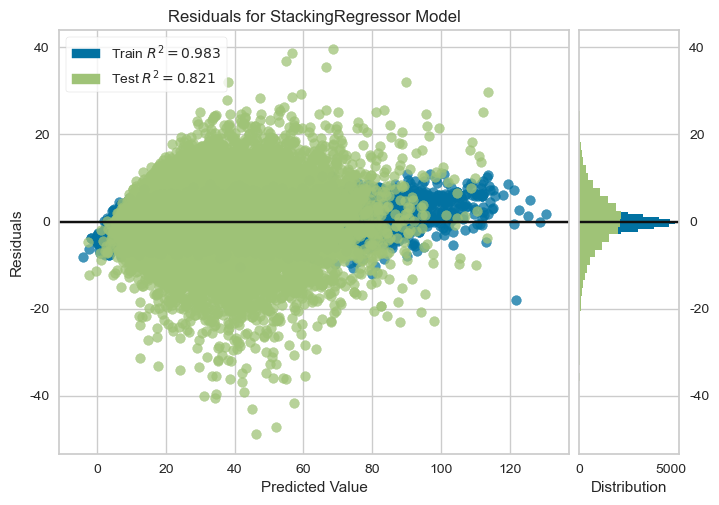

In [30]:
plot_model(blender, plot = 'residuals')

In [ ]:
plot_model(best, plot = 'feature')

In [ ]:
predict_model(regression_xgb)

In [ ]:
predictions = predict_model(regression_xgb, data=data_re)
predictions.head()